# Robot Module 1: Signs-of-life

# TL;DR
In this tutorial we go over the details on how to use AX-12A Dynamixel servos to build a simple robot. First we discuss different componets needed. Next, we will connect the robot to the computer and start programming the robot. Then, we will see how to read and plot skignals from our robot. Finally we wrap up with a short video which demonstrates the above.

# Robot configuration and components

<img src="components.gif">

### Components
1. **Brackets** to show robot movement
2. **Servo motor** (Dynamixel AX-12A, manufactured by robotis)
3. **Brackets** holds to servos together
4. **Connector pins** (aka cables and plug) connects the two servos together so they can communicate with each other
5. **Power supply** supplies the power for the servos
6. **USB2Dynamixel** (manufactured by robotis) connects the servos to computer and sends and receives commands, to and from the servos

# Connect robot to power adapter and computer
**First** thing to do is to connect the USB2Dynamixel to computer (you will see a red light turns on). **Next**, power on the servo motors (you will see two red LEDs blink for half a second) and **finally** connect the proximal cable of the servo to the USB2Dynamixel and connect the two servos with another cable.

# Initialize robot + read signals (temperature, ...)

Next step is to write the program to detect the servos by the computer.
The Following cell **scans for the connected servos** and store the references to servos to a list.

In [1]:
from lib_robotis_hack import *

D = USB2Dynamixel_Device(dev_name="/dev/ttyUSB0",baudrate=1000000)
s_list = find_servos(D)
s1 = Robotis_Servo(D,s_list[0])
s2 = Robotis_Servo(D,s_list[1])

Scanning for Servos.

 FOUND A SERVO @ ID 2


 FOUND A SERVO @ ID 3



And here we can **read the angle, load, temperature (celcius) and voltage (volts)** for each of the servos.

In [13]:
print s1.read_angle() # in radian
print s1.read_encoder() # in encoder ticks
print s1.read_load()
print s1.read_temperature()
print s1.read_voltage()

-1.80498406041
159
-0.0
38
12.3


In [47]:
print s2.read_angle()
print s2.read_load()
print s2.read_temperature()
print s2.read_voltage()

-1.03799366647
-0.0
39
12.3


# Robot movement

The movement of the robot can be controlled in both **angular** and **encoder** format as follows:


In [64]:
for i in range(2):
    s1.move_angle(-1.0)
    s1.move_angle(1.0)

for i in range(2):
    s2.move_angle(1.0)
    s2.move_angle(-1.0)

In [70]:
s1.move_to_encoder(300)

[]

Enabling and disabling the torque can be done like what follows. Enabling the torque means you can't move the robot by hand. When you disable the torque you can observe that servo can be rotated by hand easily.

In [54]:
s1.enable_torque()
s1.disable_torque()

[]

# Visualize robot operations (plots)

### Real time plotting

Here you can find the script to do a real time plotting of the angular position of the servo.
First, a seperate thread is created so we can rotate the servo wthout any interference from any other process.
Next, the real time plotting of the angular position is done and the plot gets updated.

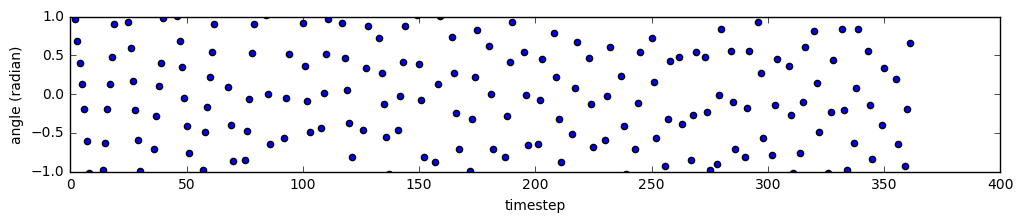

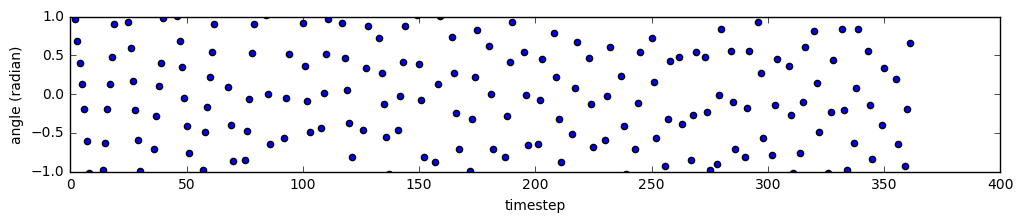

In [2]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 2)

import thread

# Define a function for the thread
def change_angle(threadName, delay):
    count = 0
    while count < 50:
        time.sleep(delay)
        s1.move_angle(-s1.read_angle())
#         print "%s" % (threadName)
        count += 1

try:
    thread.start_new_thread(change_angle, ("Change angle thread", 0.2, ))
except:
    print "Error: unable to start thread"

# ===============================

import numpy as np
import matplotlib.pyplot as plt
from IPython import display

plot_pause_time = 0.05
horizon_length = int(20 / plot_pause_time)
plt.axis([0, horizon_length, -1, 1])
plt.xlabel('timestep')
plt.ylabel('angle (radian)')
plt.ion()

for i in range(horizon_length):
    y = s1.read_angle()
    plt.scatter(i, y)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.pause(plot_pause_time)

# while True:
#     plt.pause(0.05)

### Off line plotting
Here you can find a code that stores the values for the angular position during the time when servo is working, save them to a file, load the data from the file and then plot those values.

In [21]:
%matplotlib inline

import thread
import pickle

angular_values = []
# Define a function for the thread
def store_angular_position(threadName, delay):
    count = 0
    while count < 50:
        time.sleep(delay)
        angular_values.append(s2.read_angle())
        count += 1
    with open("angular_vals.pkl", 'wb') as f:
        pickle.dump(angular_values, f)
    print "Saved values to file..."

try:
    thread.start_new_thread(store_angular_position, ("Save angular value thread", 0.1, ))
except:
    print "Error: unable to start thread"

# ===============================

import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
    s2.move_angle(-s2.read_angle())


Saved values to file...


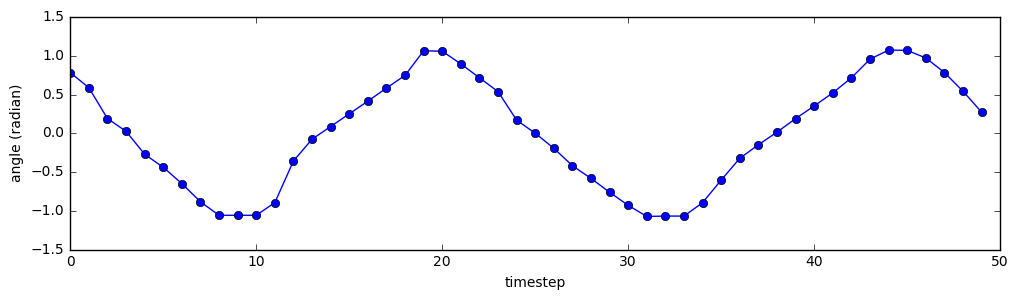

In [28]:
with open("angular_vals.pkl", 'rb') as f:
    ang_vals = pickle.load(f)
plt.plot(range(0, 50), ang_vals, '-o')
plt.xlabel('timestep')
plt.ylabel('angle (radian)')
plt.show()

# Video

The link to the video which shows online plotting with the servo working is here:

<a href="http://www.youtube.com/watch?feature=player_embedded&v=_8e-EwCGLJQ
" target="_blank"><img src="http://img.youtube.com/vi/_8e-EwCGLJQ/0.jpg" 
alt="robot_module_1_video" width="640" height="320" border="10" /></a>